# **<u>Multiple Linear Regression</u>(MLR):**
- Reltionship b/w a dependent/outcome variable and several independent variables(features).
- Functional form of MLR is given by
$$Y_i = \beta_o + \beta_1X_{1i} + \beta_2X_{2i} + \cdots + \beta_kX_{ki} + \epsilon_i$$
- The regg. coeffs. $\beta_1, \beta_2, \cdots,\beta_k$ are called *partial regression coefficients* coefficients since the relationship  between an explanatory variable and the response (outcome) variable is calculated after removing (or  controlling) the effect all the other explanatory variables (features) in the model. 

- The assumptions that are made in multiple linear regression model are as follows:  
    1. The regression model is linear in regression parameters $(\beta-values)$.  
    2. The residuals follow a normal distribution and the expected value (mean) of the residuals is zero.  
    3. In time series data, residuals are assumed to uncorrelated.
    4. The variance of the residuals is constant for all values of Xi. When the variance of the residuals  is constant for different values of Xi, it is called homoscedasticity. A non-constant variance of  residuals is called heteroscedasticity.
    5. There is no high correlation between independent variables in the model (called **multi-collinearity**).  Multi-collinearity can destabilize the model and can result in an incorrect estimation of the  regression parameters.  
- The partial regressions coefficients are estimated by minimizing the sum of squared errors (SSE).

## **Developing Multiple Linear Regression Model Using Python** 

### 1. ***Loading the DataSet:***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
pd.pandas.set_option("display.max_columns", None) #To show all the columns

In [2]:
# IPL Data
ipl_auction_dataset = pd.read_csv(os.getcwd()+"\Data\IPL IMB381IPL2013.csv")

In [3]:
ipl_auction_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [4]:
# ipl_auction_dataset.iloc[0:5, 0:10]
ipl_auction_dataset.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,0.0,0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,37.6,0,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,32.9,0,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,36.8,0,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,0.0,0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [5]:
from PIL import Image

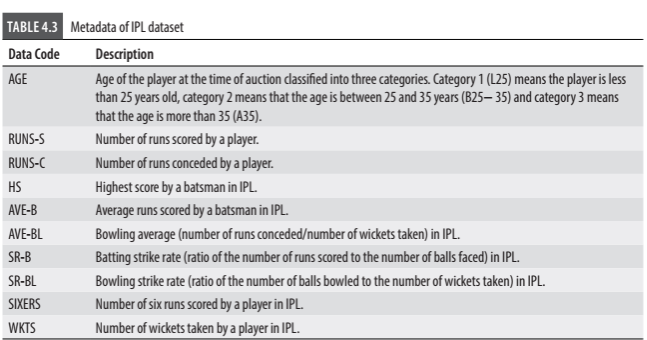

In [6]:
im1 = Image.open("ipl_metadata1.png")
im2 = Image.open("ipl_metadata2.png")
im1

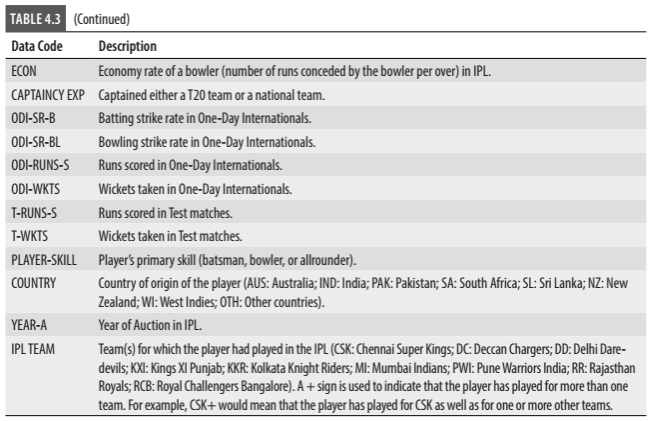

In [7]:
im2

In [8]:
# making a copy of original dataset
ipl_auction_df = ipl_auction_dataset.copy()

#Dropping coulmns not required in model building
ipl_auction_df.drop(['Sl.NO.', 'BASE PRICE'], axis=1, inplace=True)

ipl_auction_df.columns

Index(['PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE', 'T-RUNS',
       'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'SOLD PRICE'],
      dtype='object')

- We can build a model to understand what features of players are influencing their SOLD PRICE.
- We will create a variable X_feature which will  contain the list of features that we will finally use for building the model and ignore rest of the columns  of the DataFrame.

In [9]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS',
       'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

### 2. ***Encoding Categorical Features:***

Most of the features in the dataset are numerical (ratio scale) whereas features such as ['AGE', 'COUNTRY',  'PLAYING ROLE', 'CAPTAINCY EXP'] are categorical and hence need to be encoded before building the  model. Categorical variables cannot be directly included in the regression model, and they must be  encoded using dummy variables before incorporating in the model building. 

In [10]:
# ipl_auction_df.dtypes == 'object'
ipl_auction_df.columns.to_series().groupby(ipl_auction_df.dtypes).groups

{int64: ['AGE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-WKTS', 'CAPTAINCY EXP', 'RUNS-S', 'HS', 'SIXERS', 'RUNS-C', 'WKTS', 'AUCTION YEAR', 'SOLD PRICE'], float64: ['ODI-SR-B', 'ODI-SR-BL', 'AVE', 'SR-B', 'AVE-BL', 'ECON', 'SR-BL'], object: ['PLAYER NAME', 'COUNTRY', 'TEAM', 'PLAYING ROLE']}

- Qualitative variables or categorical variables need to be encoded using dummy variables before incorporating  them in the regression model. 
- If a categorical variable has n categories (e.g., the player role in the data has four  categories, namely, batsman, bowler, wicket-keeper and allrounder), then we will need n − 1 dummy variables. So, in the case of PLAYING ROLE, we will need three dummy variables since there are four categories as shown in below cell.
- The variable can be converted into four dummy variables. Set the variable value to 1 to indicate the role  of the player. This can be done using *pd.get_dummies()* method.

In [11]:
ipl_auction_df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [12]:
pd.get_dummies(ipl_auction_df['PLAYING ROLE']).head()

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


**Dummy Variables**

- **Whenever we have n levels (or categories) for a qualitative variable (categorical variable), we will use  (n − 1) dummy variables, where each dummy variable is a binary variable used for representing whether  an observation belongs to a category or not.**

- *The reason why we create only (n − 1) dummy variables  is that inclusion of dummy variables for all categories and the constant in the regression equation will  create perfect multi-collinearity (will be discussed later).* **To drop one category, the parameter drop_ first  should be set to True.**  

- Explanation: https://youtu.be/bnjPzHQ04Ac

In [13]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

In [14]:
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[X_features], columns=categorical_features, drop_first=True)

In [15]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [16]:
ipl_auction_encoded_df.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AGE_2,AGE_3,COUNTRY_BAN,COUNTRY_ENG,COUNTRY_IND,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [17]:
# Now new features can be stated as
X_features = ipl_auction_encoded_df.columns

### 3. ***Splitting the data into Train & Validation Sets***

In [18]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [19]:
X = sm.add_constant(ipl_auction_encoded_df)
Y = ipl_auction_df['SOLD PRICE']

train_X, test_X, train_y, test_y = train_test_split(X,Y, train_size=0.8, random_state=42)

C:\Users\Amit Vikram Raj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 4. ***Building the model on training dataset***

In [20]:
ipl_model_lm = sm.OLS(train_y, train_X).fit()
ipl_model_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2022-08-01 20:51        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

**As per the p-value (<0.05), only the features  HS, AGE_2, AVE and COUNTRY_ENG have come out significant. The model says that none of the other  features are influencing SOLD PRICE (at a significance value of 0.05). This is not very intuitive and could  be a result of multi-collinearity effect of variables.**

### 5. ***Multi-Collinearity and Handling Multi-Collinearity***
- When the dataset has a large number of independent variables (features), it is possible that few of these  independent variables (features) may be highly correlated. **The existence of a high correlation between  independent variables is called multi-collinearity.** Presence of multi-collinearity can destabilize the MLR model. Thus it's necessary to identify the presence of multi-collinearity. 
- Multi-collinearity can have the following impact on the model:  
    1. The standard error of estimate is inflated.  
    2. A statistically significant explanatory variable may be labelled as statistically insignificant due to  the large p-value. This is because when the standard error of estimate is inflated, it results in an  underestimation of $t-statistic$ value.  
    3. The sign of the regression coefficient may be different, that is, instead of negative value for regression coefficient, we may have a positive regression coefficient and vice versa.  
    4. Adding/removing a variable or even an observation may result in large variation in regression  coefficient estimates. 


### 5.1 ***Variance Inflation Factor(VIF)***
- **VIF is a measure used for identifying the exsistence of multi-collinarity.**
- In case of SLR : $X_1 = \alpha_0 + \alpha_1X_2$, VIF is given by $$VIF = \frac{1}{1-R^2}$$
- $\sqrt{VIF}$ is the value by which $t-static$ value is defalted.
- $VIF > 4$ needs further analysis to asses impact of multi-collinearity.
- *One approach to eliminate multi-collinearity is  to remove one of the variables from the model building.*  
- *variance_inflation_factor() method available in statsmodels.stats.outliers_influence package can be  used to calculate VIF for the features.*

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_factors(X):
    X_matrix = X.values # X.to_numpy() # (X.as_matrix()- this does not works)
    vif = [variance_inflation_factor(X_matrix, i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    
    return vif_factors

In [22]:
# Now, calling the above method with the X features will return the VIF for the corresponding features. 

vif_factors = get_vif_factors(X[X_features])
vif_factors

,column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


### 5.2 ***Checking Correlation of Columns with Large VIFs***
We can generate a correlation heatmap to understand the correlation between the independent variables  which can be used to decide which features to include in the model. We will first select the features that  have VIF value of more than 4. 

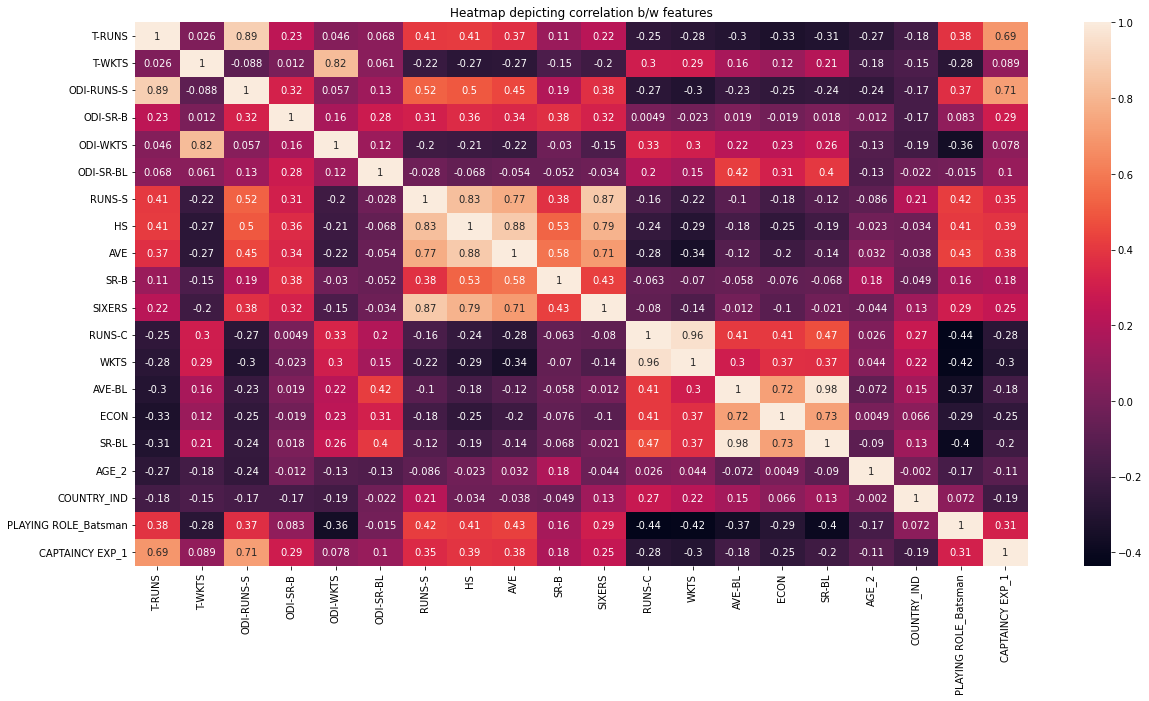

In [23]:
# columns_with_vif > 4
columns_with_large_vif = vif_factors[vif_factors.VIF > 4].column

# Plotting the heatmap
plt.figure(figsize = (20,10))
sns.heatmap(X[columns_with_large_vif].corr(), annot = True)
plt.title("Heatmap depicting correlation b/w features");

- The following observations are made from the heatmap:  
   1. T-RUNS and ODI-RUNS-S are highly correlated, whereas ODI-WKTS and T-WKTS are highly  correlated. 
   2. Batsman features like RUNS-S, HS, AVE, SIXERS are highly correlated, while bowler’s features  like AVE-BL, ECON and SR-BL are highly correlated.  
- To avoid multi-collinearity, we can keep only one column from each group of highly correlated variables  and remove the others. 
- **Now which one to keep and which one to remove depends on the understanding  of the data and the domain.**
- We have decided to remove the following features. Please note that it may take multiple iterations  before deciding at a final set of variables, which do not have multi-collinearity. These iterations have been  omitted here for simplicity. 


*Pradhan, Manaranjan; U Dinesh Kumar. Machine Learning using Python (p. 123). Kindle Edition.* 

In [24]:
columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS', 'AVE',  'RUNS-C', 'SR-B', 'AVE-BL', 'ECON',  'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL'] 

In [25]:
X_new_features = list(set(X_features) - set(columns_to_be_removed))

In [26]:
get_vif_factors(X[X_new_features])
# all the vif's are less than 4 now, thus no multi-collinearity

,column,VIF
0,PLAYING ROLE_W. Keeper,1.900941
1,ODI-SR-BL,2.822148
2,AGE_3,1.779861
3,SIXERS,2.397409
4,COUNTRY_NZ,1.173418
5,COUNTRY_IND,3.144668
6,ODI-WKTS,2.742889
7,COUNTRY_BAN,1.094293
8,COUNTRY_SL,1.519752
9,PLAYING ROLE_Bowler,3.060168


The VIFs on the final set of variables indicate that there is no multi-collinearity present any more  (VIF < 4). We can proceed to build the model with these set of variables now. 

### 5.3 ***Bulding new model after removing multi-collinearity***

In [27]:
train_X = train_X[X_new_features]

ipl_model_2 = sm.OLS(train_y, train_X).fit()
ipl_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2022-08-01 20:51   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7280  282672.8801
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2453
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6541  440086.1502
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5006  709026.1444
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6315  403448.7600
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

- The $p-values$ of the coefficients estimated show whether the variables are statistically significant in influencing response variables or not. 
- If the $p-value$ is less than the significance value $(\alpha)$ then the  feature is statistically significant, otherwise it is not. 
- The value of $\alpha$ is usually selected as 0.05; however, it  may be chosen based on the context of the problem.  


- Based on the $p-values$, only the variables 'COUNTRY_IND', 'COUNTRY_ENG', 'SIXERS','CAPTAINCY EXP_1' have come out statistically significant. So, the features that decide the 'SOLD PRICE' are:  
  1. Whether the players belong to India or England (i.e., origin country of the player).  
  2. How many sixes has the player hit in previous versions of the IPL? How many wickets have been  taken by the player in ODIs?  
  3. Whether the player has any previous captaincy experience or not. 

In [28]:
# new model
significant_vars = ['COUNTRY_IND', 'COUNTRY_ENG', 'SIXERS','CAPTAINCY EXP_1']
train_X = train_X[significant_vars]

ipl_model_3 = sm.OLS(train_y, train_X).fit()
ipl_model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2022-08-01 20:51 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

- The following inference can be derived from the latest model ipl_model_3    
   1. All the variables are statistically significant, as $p-value < 0.05\%$.  
   2. The overall model is significant as the $p-value$ for the F-statistics is also less than $0.05\%$.  
   3. The model can explain $71.5\%$ of the variance in SOLD PRICE as the $R-squared$ value is $0.715$ and  the adjusted R-squared value is $0.704\%$. 
- **Adjusted R-squared is a measure that is calculated after  normalizing SSE(Sum of Squares of Unexplained Variation(errors)) and SST(Sum of Squares of Total Variation) with the corresponding degrees of freedom.** 

### 6. ***Residual Analysis in MLR:***

#### 6.1 ***Test for Normality of Residuals(P-P Plot)***
   **Regression assums that residuals/errors should be normally distributed, to verify this we use P-P Plot.**

In [29]:
def draw_pp_plot(model, title):
    '''draw_pp_plot() which takes the model output (residuals) and draws the P-P plot.'''
    probplot = sm.ProbPlot(model.resid, fit=True)
    plt.figure(figsize = (8,6))
    probplot.ppplot(line = '45')
    plt.title(title)
    plt.show();

C:\Users\Amit Vikram Raj\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x432 with 0 Axes>

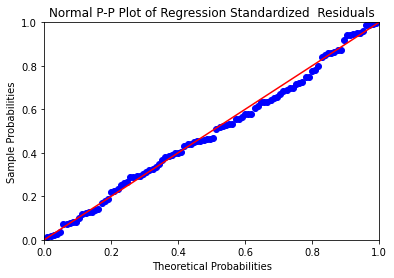

In [30]:
draw_pp_plot(ipl_model_3,"Normal P-P Plot of Regression Standardized  Residuals")

- In above graph the *diagonal line is the cumulative distribution of a normal distribution*, whereas the *dots  represent the cumulative distribution of the residuals.*


- ***Since the dots are close to the diagonal line, we can  conclude that the residuals follow an approximate normal distribution (we need only an approximate  normal distribution).*** 
 

#### 6.2 ***Residual Plot for Homoscedasticity & Model Specification***
- An important assumption of the regression model is that the residuals have constant variance (homoscedasticity) across different values of the predicted value (Y).

- The homoscedasticity can be  observed by drawing a **residual plot**, which is **a plot between standardized residual value and standardized predicted value.**

- Residual plot with shape such as a funnel may indicate existence of *heteroscedasticity*. **Any pattern in the residual plot may also indicate the use of incorrect  functional form in the regression model development.** 


In [31]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

In [32]:
def plot_resid_fitted(fitted, resid, title):
    plt.scatter(get_standardized_values(fitted), get_standardized_values(resid))
    plt.title(title)
    plt.xlabel("Standardized Predicted Value")
    plt.ylabel("Standardized Residual Value")
    plt.show();

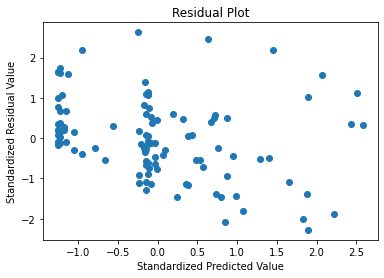

In [33]:
plot_resid_fitted(ipl_model_3.fittedvalues, ipl_model_3.resid, "Residual Plot")

**The residuals in above plot do not show any signs of heteroscedasticity (no funnel-like pattern).** 

### 7. ***Detecting Influencers*** 
- In OLS estimate, we assume that each record in the data has equal influence on the model parameters  (regression coefficients), which may not be true. We can use the function influence_plot().
- ***Leverage value of more than $\frac{3(k + 1)}{n}$  is treated as highly influential observation***, where $k$ is the number of features in the model and $n$ is the  sample size.
- ***Leverage value of more than $\frac{3(k + 1)}{n}$  is treated as highly influential observation.***

In [34]:
k = train_X.shape[1]
n = train_X.shape[0]
print("No. of variables:", k, "and Number of observations:", n)

leverage_cutoff = (3*(k+1))/n

print("Cutoff for leverage value:", round(leverage_cutoff, 3))

print("So observations with leverage value more than {} are highly influential".format(round(leverage_cutoff, 3)))

No. of variables: 4 and Number of observations: 104
Cutoff for leverage value: 0.144
So observations with leverage value more than 0.144 are highly influential


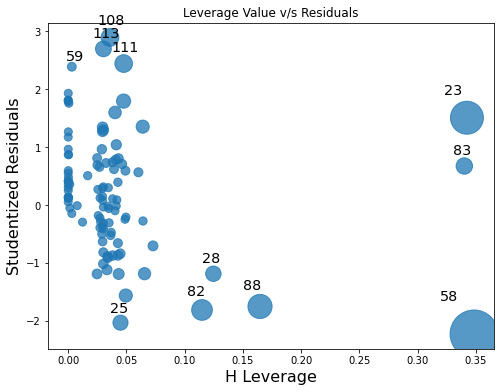

In [35]:
from statsmodels.graphics.regressionplots import influence_plot

fig,ax = plt.subplots(figsize=(8,6))
influence_plot(ipl_model_3, ax= ax)
plt.title("Leverage Value v/s Residuals")
plt.show()

The above diagram shows there are three observations 23, 58, 83 that have comparatively high leverage  with residuals.

These observations do not have large residuals. So, it may not be necessary to remove these observations. 

But if the observations need to be removed, the following method drop() can be used: 

In [36]:
train_X_new = train_X.drop([23, 58, 83], axis = 0) 
train_y_new = train_y.drop([23, 58, 83], axis = 0) 

# ipl_model_4 = sm.OLS(train_y_new, train_X_new).fit()
# ipl_model_4.summary2()
# Since observations do not have large residuals, it's not benificial to remove

### 8. ***Transforming Response Variable***
- Transformation is a process of deriving new dependent and/or independent variables to identify  the correct functional form of the regression model. 
- For example, the dependent variable Y may be  replaced in the model with $\ln(Y)$, $1/Y$, etc. and similarly, an independent variable X may be replaced  with $ln(X)$, $1/X$, etc.  
- Transformation in MLR is used to address the following issues:  
    1. Poor fit (low R-squared value).  
    2. Pattern in residual analysis indicating a potential non-linear relationship between the dependent and independent variables.  
    3. Residuals do not follow a normal distribution.  
    4. Residuals are not homoscedastic. 

In [37]:
# here we use sqrt 
train_y = np.sqrt(train_y)

ipl_model_5 = sm.OLS(train_y, train_X).fit()
ipl_model_5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.741     
Dependent Variable:     SOLD PRICE       AIC:                         1527.9999 
Date:                   2022-08-01 20:51 BIC:                         1538.5775 
No. Observations:       104              Log-Likelihood:              -760.00   
Df Model:               4                F-statistic:                 75.29     
Df Residuals:           100              Prob (F-statistic):          2.63e-29  
R-squared (uncentered): 0.751            Scale:                       1.3550e+05
-----------------------------------------------------------------------------------
                    Coef.      Std.Err.      t       P>|t|      [0.025      0.975] 
-----------------------------------------------------------------------------------
COUNTRY_IND        490.7089     63.9238    7.6765    0.0000    363.8860    617.5318
COUNTRY_ENG        563.0261    217.2801    2.5912    0.0110    131.9486    994.1036
SIXERS               8.5338      1.6995    5.0213    0.0000      5.1620     11.9055
CAPTAINCY EXP_1    417.7575     76.0204    5.4953    0.0000    266.9352    568.5799
--------------------------------------------------------------------------------
Omnibus:                   0.017             Durbin-Watson:                1.879
Prob(Omnibus):             0.992             Jarque-Bera (JB):             0.145
Skew:                      0.005             Prob(JB):                     0.930
Kurtosis:                  2.817             Condition No.:                165  
================================================================================

"""

**the R-squared value of the model has increased to 0.751.**

C:\Users\Amit Vikram Raj\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 576x432 with 0 Axes>

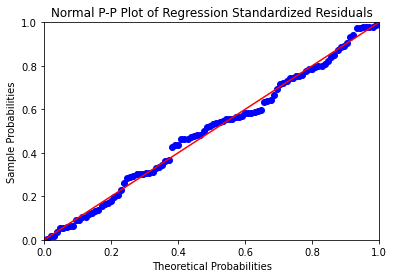

In [38]:
draw_pp_plot(ipl_model_5, "Normal P-P Plot of Regression Standardized Residuals")

### 9. ***Making Predictions on Validation Set***
As the model we have built predicts square root of the SOLD PRICE, we need to square the predicted values to get the actual SOLD  PRICE of the players. 

In [40]:
pred_y = np.power(ipl_model_5.predict(test_X[train_X.columns]), 2)

#### ***9.1 Measuring RMSE***

In [41]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

496151.18122558616

#### ***9.2 Measuring R-squared Value***

In [42]:
np.round(metrics.r2_score(pred_y, test_y), 3)

0.443

- **The accuracy (R-squared) value on validation set (0.44) is quite low compared to the accuracy reported by the model on training dataset (0.751).**
- ***This could a sign of model over-fitting.***

### ***Auto-correlation b/w Error Terms***
- The regression model is that there should be no correlation between error terms.

- If there is an auto-correlation, the standard error estimate of the beta coefficient may be underestimated and that will result in over-estimation of the t-statistic value, which, in turn, will result in a low  p-value. 

- Thus, a variable which has no statistically significant relationship with the response variable may  be accepted in the model due to the presence of auto-correlation. 

- The presence of auto-correlation can be  established using the Durbin−Watson test.
- As a thumb rule, a Durbin−Watson statistic close to 2 would  imply the absence of autocorrelation.  

- The model summary shows that the Durbin−Watson statistics value is 1.879, which close to 2;  hence it can be concluded that the error terms are not auto-correlated.

- Note that auto-correlation is more  relevant in the case of time-series data. 